In [2]:
!pip install diffusers accelerate safetensors transformers==4.25.1

In [4]:
import PIL
import requests
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

In [5]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [6]:
url = "https://raw.githubusercontent.com/timothybrooks/instruct-pix2pix/main/imgs/example.jpg"
def download_image(url):
    image = PIL.Image.open(requests.get(url, stream=True).raw)
    image = PIL.ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    return image
image = download_image(url)

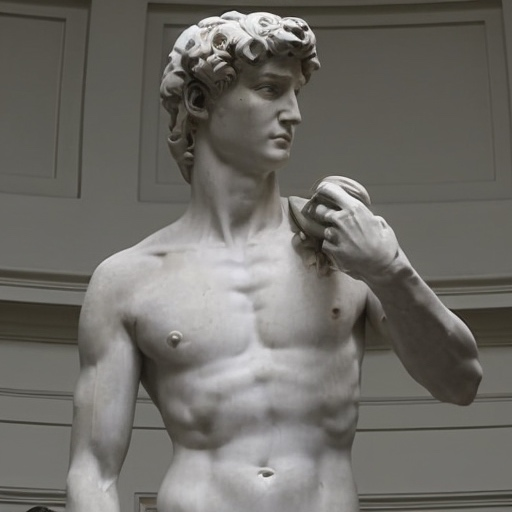

In [7]:
image

  0%|          | 0/10 [00:00<?, ?it/s]

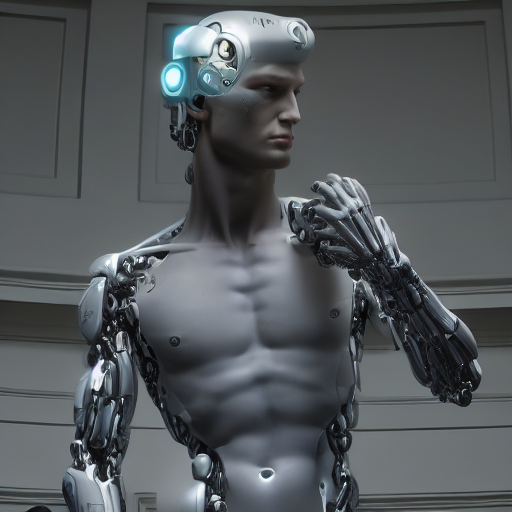

In [8]:
prompt = "turn him into cyborg"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]

In [11]:
from PIL import Image

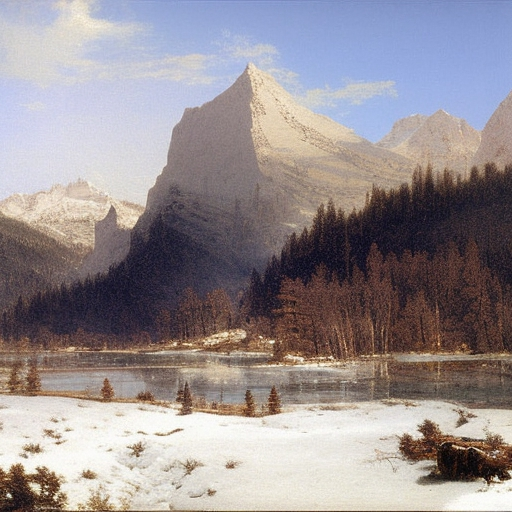

In [13]:
image_path = './test_imgs/test2.png'
image = Image.open(image_path).convert("RGB")
image

  0%|          | 0/10 [00:00<?, ?it/s]

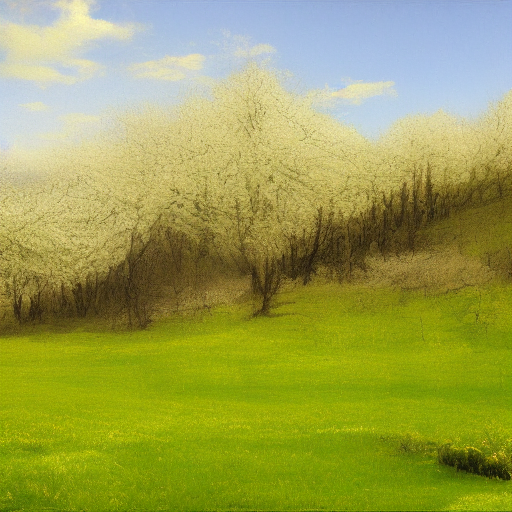

In [15]:
prompt = "turn it into spring"
images = pipe(prompt, image=image, num_inference_steps=10, image_guidance_scale=1).images
images[0]

In [4]:
from tqdm import tqdm
from PIL import Image
import json

DATASET_PATH = '../../../test_dataset'
DATA_FILE = 'prompt.json'

In [5]:
import os
os.listdir(DATASET_PATH)

['test.py',
 'raw.csv',
 'convertor.py',
 'remove',
 '.DS_Store',
 'src',
 '.ipynb_checkpoints',
 'prompt.json']

In [13]:
with open(f'{DATASET_PATH}/{DATA_FILE}') as file:
    # Load 
    items = file.readlines()
    with tqdm(total=len(items)) as pbar:
        for item in items:
            item = item.strip()
            # Convert to dict
            item = json.loads(item)
            print(item)
            # Process the item here
            # read Image from source and It is RGB
            img = Image.open(f'{DATASET_PATH}/{item["src"]}')
            # show image
            # img.show()
            pbar.update(1)
            break

  1%|█████                                                                                                                                                                                                                                                                                                                                                    | 1/69 [00:00<00:00, 723.41it/s]

{'index': 1, 'src': './src/4320622_0.jpg', 'prompt': 'make it a real picture', 'prompt_reverse': 'make it a painting', 'dst': './dst/4320622_0_001.jpg', 'p2p': './pix2pix/4320622_0_001.jpg', 'cln': './control/4320622_0_001.jpg'}


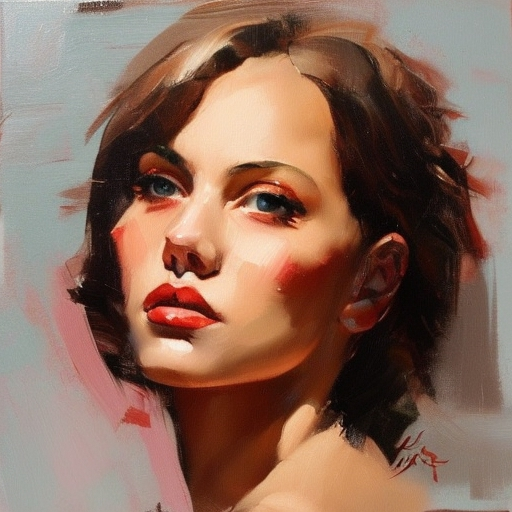

In [12]:
img

# Merge from here

In [1]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

2024-01-25 19:52:13.493530: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-25 19:52:13.493587: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-25 19:52:13.541884: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-25 19:52:14.512075: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-25 19:52:14.512200: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

In [2]:
from tqdm import tqdm
from PIL import Image
import json

DATASET_PATH = '../../../test_dataset'
DATA_FILE = 'prompt.json'

In [3]:
model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
with open(f'{DATASET_PATH}/{DATA_FILE}') as file:
    # Load 
    items = file.readlines()
    with tqdm(total=len(items)) as pbar:
        for item in items:
            item = item.strip()
            # Convert to dict
            item = json.loads(item)
            # prompt
            prompt = item['prompt']
            # read Image from source and It is RGB
            img = Image.open(f'{DATASET_PATH}/{item["src"]}')
            images = pipe(prompt, image=img, num_inference_steps=10, image_guidance_scale=1).images
            images[0].save(f'{DATASET_PATH}/{item["dst"]}')
            pbar.update(1)
            break

  0%|                                                                                                                                                                                                                                                                                                                                                                  | 0/69 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  1%|█████                                                                                                                                                                                                                                                                                                                                                     | 1/69 [00:01<01:14,  1.10s/it]


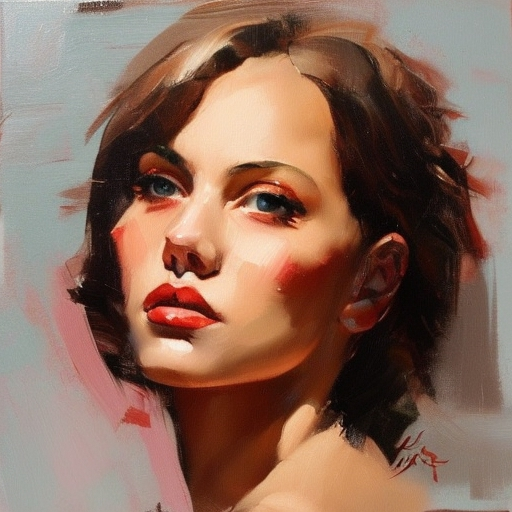

In [6]:
img

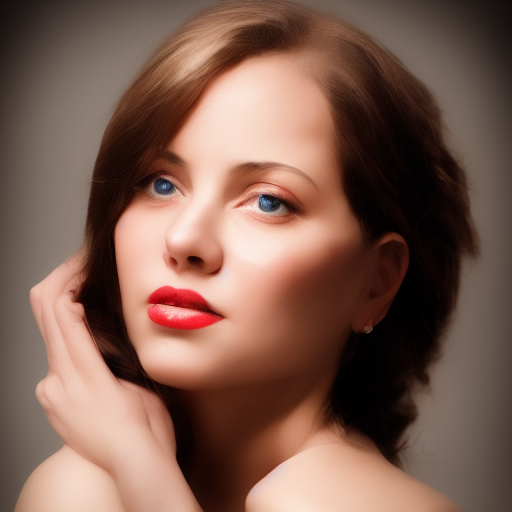

In [7]:
images[0]